In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv(r"/kaggle/input/digit-recognizer/train.csv")

In [4]:
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

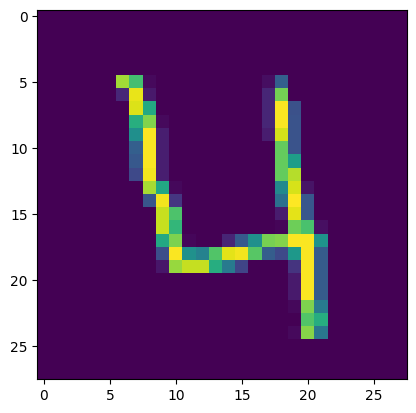

In [6]:
new=np.array(df.iloc[3,1:])
new=new.reshape(28,28)
plt.imshow(new);

In [7]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

# Train the model without PCA

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=32)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
kne=KNeighborsClassifier()

In [12]:
kne.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
y_pred=kne.predict(X_test)

In [14]:
print(accuracy_score(y_test,y_pred))

0.9657142857142857


# Train the model using PCA

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [17]:
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.fit_transform(X_test)

In [18]:
X_train_sc.shape

(33600, 784)

In [19]:
from sklearn.decomposition import PCA

In [24]:
pca=PCA(n_components=100)

In [25]:
X_train_pca=pca.fit_transform(X_train_sc)
X_test_pca=pca.fit_transform(X_test_sc)

In [26]:
X_train_pca.shape

(33600, 100)

In [27]:
kne=KNeighborsClassifier()

In [30]:
kne.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
y_pred=kne.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9657142857142857


# Visualization the data in 2D

In [32]:
import plotly.express as px

In [36]:
pca=PCA(n_components=2)
X_train_two=pca.fit_transform(X_train_sc)

In [39]:
X_train_two

array([[-6.24599959, -3.72927692],
       [ 0.54410354, -3.68601045],
       [ 5.8003413 , -4.40211471],
       ...,
       [-7.57446942, -1.43743056],
       [ 2.55550675,  6.06210269],
       [-7.47177177,  0.01742639]])

In [47]:
flg=px.scatter(x=X_train_two[:,0],y=X_train_two[:,1],
               color=y_train.astype(str),
               color_discrete_sequence=px.colors.qualitative.G10)
flg.show()

# Visualization the data in 3D

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca=PCA(n_components=3)

In [52]:
transf_in_3D=pca.fit_transform(X_train_sc)

In [53]:
transf_in_3D

array([[-6.24606485, -3.72997036,  3.22092212],
       [ 0.54420599, -3.68551781,  1.20017923],
       [ 5.80045594, -4.40120853, -1.89831811],
       ...,
       [-7.57442914, -1.43693404,  2.12963973],
       [ 2.55547855,  6.06179148, 15.0810414 ],
       [-7.47171616,  0.01810717,  1.21817924]])

In [54]:
import plotly.express as px

In [65]:
flg=px.scatter_3d(x=transf_in_3D[:,0],y=transf_in_3D[:,1],
                  z=transf_in_3D[:,2],color=y_train.astype(str))
flg.update_layout(
    margin=dict(l=20,r=20,t=20,b=20)
)
flg.show()